# Introduction

---

In [ ]:
!pip install kagglehub

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from matplotlib.font_manager import FontProperties
from termcolor import colored

In [ ]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
import kagglehub

path = kagglehub.dataset_download("belayethossainds/renewable-energy-world-wide-19652022")

print("Path to dataset files:", path)

100%|██████████| 590k/590k [00:00<00:00, 946kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/belayethossainds/renewable-energy-world-wide-19652022/versions/1


In [ ]:
import os

files = os.listdir(path)
print("Files in the dataset:", files)

Files in the dataset: ['07 share-electricity-hydro.csv', '03 modern-renewable-prod.csv', '12 solar-energy-consumption.csv', '08 wind-generation.csv', '15 share-electricity-solar.csv', '11 share-electricity-wind.csv', '09 cumulative-installed-wind-energy-capacity-gigawatts.csv', '13 installed-solar-PV-capacity.csv', '10 wind-share-energy.csv', '17 installed-geothermal-capacity.csv', '16 biofuel-production.csv', '14 solar-share-energy.csv', '06 hydro-share-energy.csv', '05 hydropower-consumption.csv', '04 share-electricity-renewables.csv', '02 modern-renewable-energy-consumption.csv', '01 renewable-share-energy.csv']


In [ ]:
path = "/root/.cache/kagglehub/datasets/belayethossainds/renewable-energy-world-wide-19652022/versions/1"

files = os.listdir(path)
print("Files in the dataset:", files)

renewable_data = pd.read_csv(os.path.join(path, '03 modern-renewable-prod.csv'))

print(renewable_data.head())

Files in the dataset: ['07 share-electricity-hydro.csv', '03 modern-renewable-prod.csv', '12 solar-energy-consumption.csv', '08 wind-generation.csv', '15 share-electricity-solar.csv', '11 share-electricity-wind.csv', '09 cumulative-installed-wind-energy-capacity-gigawatts.csv', '13 installed-solar-PV-capacity.csv', '10 wind-share-energy.csv', '17 installed-geothermal-capacity.csv', '16 biofuel-production.csv', '14 solar-share-energy.csv', '06 hydro-share-energy.csv', '05 hydropower-consumption.csv', '04 share-electricity-renewables.csv', '02 modern-renewable-energy-consumption.csv', '01 renewable-share-energy.csv']
        Entity Code  Year  Electricity from wind (TWh)  \
0  Afghanistan  AFG  2000                          0.0   
1  Afghanistan  AFG  2001                          0.0   
2  Afghanistan  AFG  2002                          0.0   
3  Afghanistan  AFG  2003                          0.0   
4  Afghanistan  AFG  2004                          0.0   

   Electricity from hydro (T

In [ ]:
path2 = kagglehub.dataset_download("nelgiriyewithana/countries-of-the-world-2023")
path2='/root/.cache/kagglehub/datasets/nelgiriyewithana/countries-of-the-world-2023/versions/1'
files2 = os.listdir(path2)
print("Files in the dataset:", files2)
world_data = pd.read_csv(os.path.join(path2, 'world-data-2023.csv'))

print(world_data.head())

100%|██████████| 23.5k/23.5k [00:00<00:00, 28.5MB/s]

Extracting files...
Files in the dataset: ['world-data-2023.csv']
       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...             

In [ ]:
filtered_df = renewable_data[renewable_data['Year'] <= 2021]

<ipython-input-13-2d82c2208a0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total Renewable Energy'] = filtered_df[[


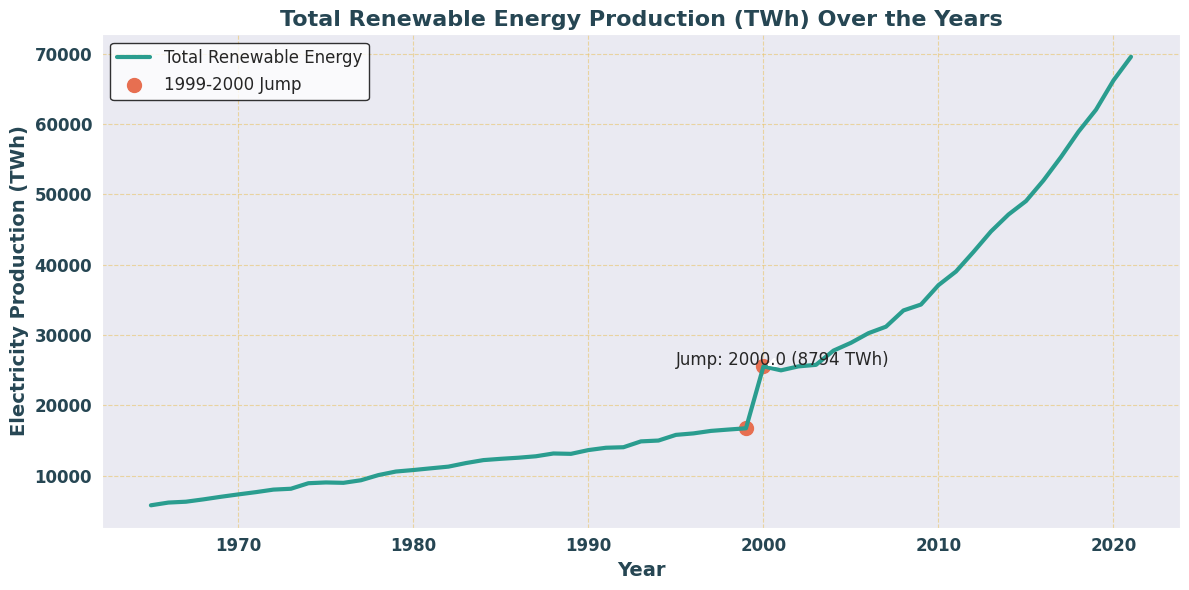

In [ ]:
filtered_df['Total Renewable Energy'] = filtered_df[[
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]].sum(axis=1)

total_by_year = filtered_df.groupby('Year')['Total Renewable Energy'].sum().reset_index()

total_by_year['Yearly Change'] = total_by_year['Total Renewable Energy'].diff()

highlight_years = total_by_year[(total_by_year['Year'] == 1999) | (total_by_year['Year'] == 2000)]

sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
plt.plot(
    total_by_year['Year'],
    total_by_year['Total Renewable Energy'],
    label='Total Renewable Energy',
    color='#2a9d8f',
    linewidth=3
)

plt.scatter(
    highlight_years['Year'], highlight_years['Total Renewable Energy'],
    color='#e76f51',
    s=100,
    label="1999-2000 Jump"
)

start_year = highlight_years.iloc[0]
end_year = highlight_years.iloc[1]
plt.annotate(
    f"Jump: {end_year['Year']} ({end_year['Total Renewable Energy'] - start_year['Total Renewable Energy']:.0f} TWh)",
    xy=(2000, end_year['Total Renewable Energy']),
    xytext=(1995, end_year['Total Renewable Energy'] + 200),
    fontsize=12,
    arrowprops=dict(facecolor='#e76f51', arrowstyle="->", lw=2)
)

plt.title(
    'Total Renewable Energy Production (TWh) Over the Years',
    fontsize=16,
    fontweight='bold',
    color='#264653'
)
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#264653')
plt.ylabel('Electricity Production (TWh)', fontsize=14, fontweight='bold', color='#264653')

plt.legend(fontsize=12, loc='upper left', frameon=True, facecolor='white', edgecolor='black')

plt.grid(linestyle='--', alpha=0.6, color='#e9c46a')

plt.xticks(fontsize=12, fontweight='bold', color='#264653')
plt.yticks(fontsize=12, fontweight='bold', color='#264653')

plt.tight_layout()

plt.show()

# Exploratory Data Analysis

---

In [ ]:
regions_to_exclude = [
    'Africa', 'Africa (BP)', 'Africa (Ember)', 'America', 'Antarctica',
    'Asia', 'Asia (Ember)', 'Asia Pacific (BP)', 'Central America',
    'CIS (BP)', 'Eastern Africa (BP)', 'Europe', 'Europe (BP)', 'Europe (Ember)',
    'European Union', 'European Union (28)', 'European Union (27)', 'European Union (15)',
    'G20 (Ember)', 'G7 (Ember)', 'High-income countries',
    'Latin America and Caribbean (Ember)', 'Low-income countries',
    'Lower-middle-income countries', 'Middle Africa (BP)', 'Middle East', 'Middle East (BP)',
    'Non-OECD (BP)', 'North America', 'North America (BP)', 'North America (Ember)',
    'OECD (BP)', 'OECD (Ember)', 'Oceania', 'Oceania (Ember)', 'South America',
    'South and Central America (BP)', 'Upper-middle-income countries',
    'Western Africa (BP)', 'World', 'European Union (27) (Ember)', 'European Union (27) (BP)'
]

filtered_df = renewable_data[~renewable_data['Entity'].isin(regions_to_exclude)]

developed_countries = [
    "United States", "Canada", "Australia", "Japan", "New Zealand", "South Korea",
    "Austria", "Belgium", "Denmark", "Finland", "France", "Germany", "Greece",
    "Ireland", "Italy", "Luxembourg", "Netherlands", "Norway", "Portugal",
    "Spain", "Sweden", "Switzerland", "United Kingdom"
]


filtered_df['Classification'] = filtered_df['Entity'].apply(
    lambda x: 'Developed' if x in developed_countries else 'Developing'
)

filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')

filtered_df = filtered_df[filtered_df['Year'] <= 2021]

filtered_df['Total_Renewable_TWh'] = (
    filtered_df['Electricity from wind (TWh)'] +
    filtered_df['Electricity from hydro (TWh)'] +
    filtered_df['Electricity from solar (TWh)'] +
    filtered_df['Other renewables including bioenergy (TWh)']
)

<ipython-input-9-147f13a8d01d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Classification'] = filtered_df['Entity'].apply(
<ipython-input-9-147f13a8d01d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')
<ipython-input-9-147f13a8d01d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
trend_data = filtered_df.groupby(['Year', 'Classification']).sum(numeric_only=True).reset_index()

fig_trend = px.line(
    trend_data,
    x='Year',
    y='Total_Renewable_TWh',
    color='Classification',
    title='Total Renewable Energy Trends: Developed vs Developing Countries',
    labels={'Total_Renewable_TWh': 'Total Renewable Energy (TWh)'},
    template='plotly_dark'
)
fig_trend.show()

source_data = filtered_df.groupby(['Year', 'Classification'])[
    ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
     'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']
].sum().reset_index()

fig_area = px.area(
    source_data,
    x='Year',
    y=['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
       'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)'],
    color='Classification',
    title='Renewable Energy Source Trends by Classification',
    labels={'value': 'Energy (TWh)', 'variable': 'Source'},
    template='plotly_dark'
)
fig_area.show()


latest_year = 2021
sunburst_data = filtered_df[filtered_df['Year'] == latest_year].groupby(['Classification', 'Entity'])[
    ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
     'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']
].sum().reset_index()

fig_sunburst = px.sunburst(
    sunburst_data.melt(id_vars=['Classification', 'Entity'],
                       value_vars=['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                                   'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']),
    path=['Classification', 'Entity', 'variable'],
    values='value',
    title='Renewable Energy Hierarchical Breakdown by Region and Source',
    template='plotly_dark'
)
fig_sunburst.show()


filtered_df= filtered_df.sort_values(by='Year')
fig_map_years = px.choropleth(
    filtered_df,
    locations='Entity',
    locationmode='country names',
    color='Total_Renewable_TWh',
    animation_frame='Year',
    title='Geographic Distribution of Renewable Energy by Year',
    labels={'Total_Renewable_TWh': 'Total Renewable Energy (TWh)'},
    template='plotly_dark',
    color_continuous_scale='Viridis'
)

fig_map_years.show()

<ipython-input-11-6b59c4b94f3f>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




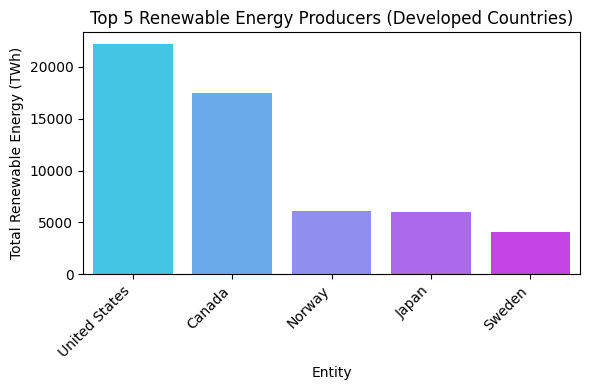

<ipython-input-11-6b59c4b94f3f>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




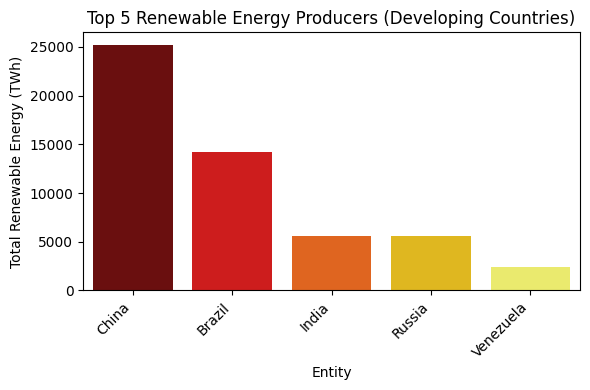

In [ ]:
top_countries = (
    filtered_df.groupby(['Entity', 'Classification'])['Total_Renewable_TWh']
    .sum()
    .reset_index()
    .sort_values(by='Total_Renewable_TWh', ascending=False)
)

top_developed = top_countries[top_countries['Classification'] == 'Developed'].head(5)
top_developing = top_countries[top_countries['Classification'] == 'Developing'].head(5)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=top_developed,
    x='Entity',
    y='Total_Renewable_TWh',
    palette='cool'
)
plt.title('Top 5 Renewable Energy Producers (Developed Countries)')
plt.ylabel('Total Renewable Energy (TWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(
    data=top_developing,
    x='Entity',
    y='Total_Renewable_TWh',
    palette='hot'
)
plt.title('Top 5 Renewable Energy Producers (Developing Countries)')
plt.ylabel('Total Renewable Energy (TWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-12-c104e4790c88>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




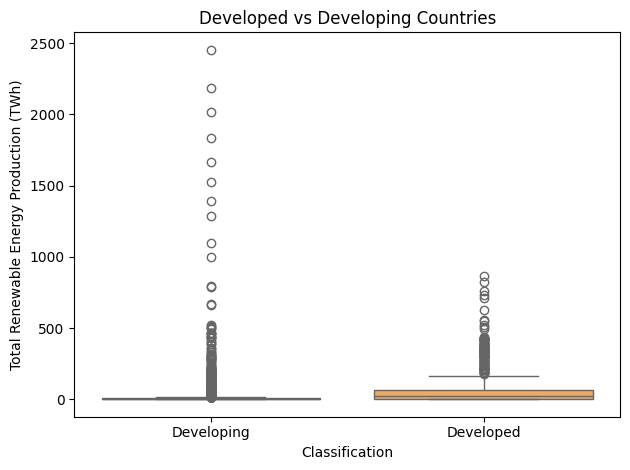

In [ ]:
sns.boxplot(
    data=filtered_df,
    x="Classification",
    y="Total_Renewable_TWh",
    palette="spring"
)
plt.title("Developed vs Developing Countries")
plt.ylabel("Total Renewable Energy Production (TWh)")
plt.tight_layout()
plt.show()

## Chi-square Test
---

In [ ]:
aggregated_df = filtered_df.groupby(['Entity', 'Classification'])['Total_Renewable_TWh'].sum().reset_index()

median_renewable = aggregated_df['Total_Renewable_TWh'].median()

aggregated_df['Renewable_Category'] = aggregated_df['Total_Renewable_TWh'].apply(
    lambda x: 'High Production' if x >= median_renewable else 'Low Production'
)

contingency_table = pd.crosstab(
    aggregated_df['Classification'], aggregated_df['Renewable_Category']
)

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"p-value: {p:.2e}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df)

Contingency Table:
Renewable_Category  High Production  Low Production
Classification                                     
Developed                        22               1
Developing                       87             107

Chi-Square Test Results:
Chi-square Statistic: 19.25
p-value: 1.15e-05
Degrees of Freedom: 1
Expected Frequencies:
Renewable_Category  High Production  Low Production
Classification                                     
Developed                 11.552995       11.447005
Developing                97.447005       96.552995


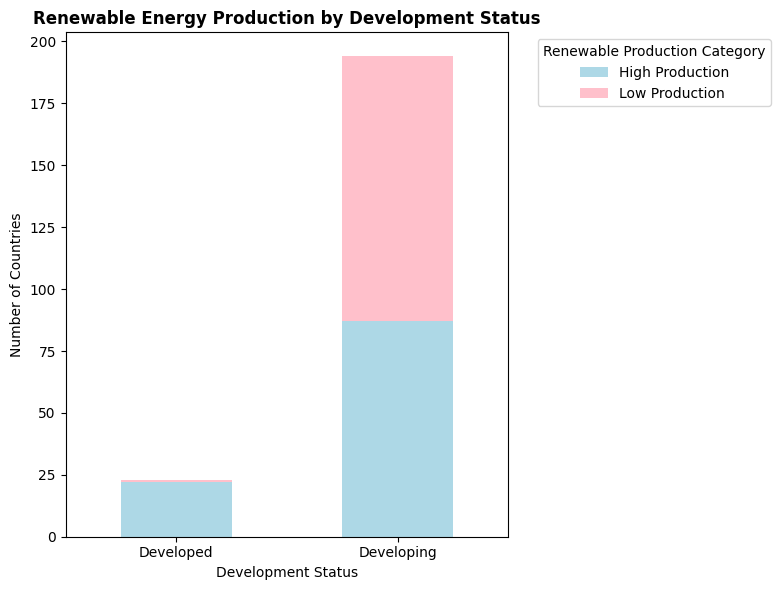

In [ ]:
contingency_table = pd.crosstab(aggregated_df['Classification'], aggregated_df['Renewable_Category'])

contingency_table.plot(kind='bar', stacked=True, color=['lightblue', 'pink'], figsize=(8, 6))

plt.title('Renewable Energy Production by Development Status', weight='bold')
plt.xlabel('Development Status')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.legend(title='Renewable Production Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Other Factors Correlation
---

In [ ]:
renewable_data.rename(columns={
    'Entity': 'Country',
    'Electricity from wind (TWh)': 'Wind (TWh)',
    'Electricity from hydro (TWh)': 'Hydro (TWh)',
    'Electricity from solar (TWh)': 'Solar (TWh)',
    'Other renewables including bioenergy (TWh)': 'Other Renewables (TWh)'
}, inplace=True)

world_data['Country'] = world_data['Country'].str.strip()

percentage_cols = [
    'Agricultural Land( %)', 'Forested Area (%)',
    'Population: Labor force participation (%)', 'Urban_population'
]

for col in percentage_cols:
    world_data[col] = world_data[col].astype(str).str.replace(',', '').str.replace('%', '').astype(float)

merged_data = pd.merge(renewable_data, world_data, on='Country', how='inner')
merged_data.head()

,Country,Code,Year,Wind (TWh),Hydro (TWh),Solar (TWh),Other Renewables (TWh),Density\n(P/Km2),Abbreviation,Agricultural Land( %),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0,60,AF,58.1,...,78.40%,0.28,"38,041,754",48.9,9.30%,71.40%,11.12%,9797273.0,33.93911,67.709953
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0,60,AF,58.1,...,78.40%,0.28,"38,041,754",48.9,9.30%,71.40%,11.12%,9797273.0,33.93911,67.709953
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0,60,AF,58.1,...,78.40%,0.28,"38,041,754",48.9,9.30%,71.40%,11.12%,9797273.0,33.93911,67.709953
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0,60,AF,58.1,...,78.40%,0.28,"38,041,754",48.9,9.30%,71.40%,11.12%,9797273.0,33.93911,67.709953
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0,60,AF,58.1,...,78.40%,0.28,"38,041,754",48.9,9.30%,71.40%,11.12%,9797273.0,33.93911,67.709953


GDP                             float64
Minimum wage                    float64
Tax revenue (%)                 float64
Gasoline Price                  float64
Co2-Emissions                   float64
Forested Area (%)               float64
Population                      float64
Urban_population                float64
Life expectancy                 float64
Land Area(Km2)                  float64
Total Renewable Energy (TWh)    float64
dtype: object


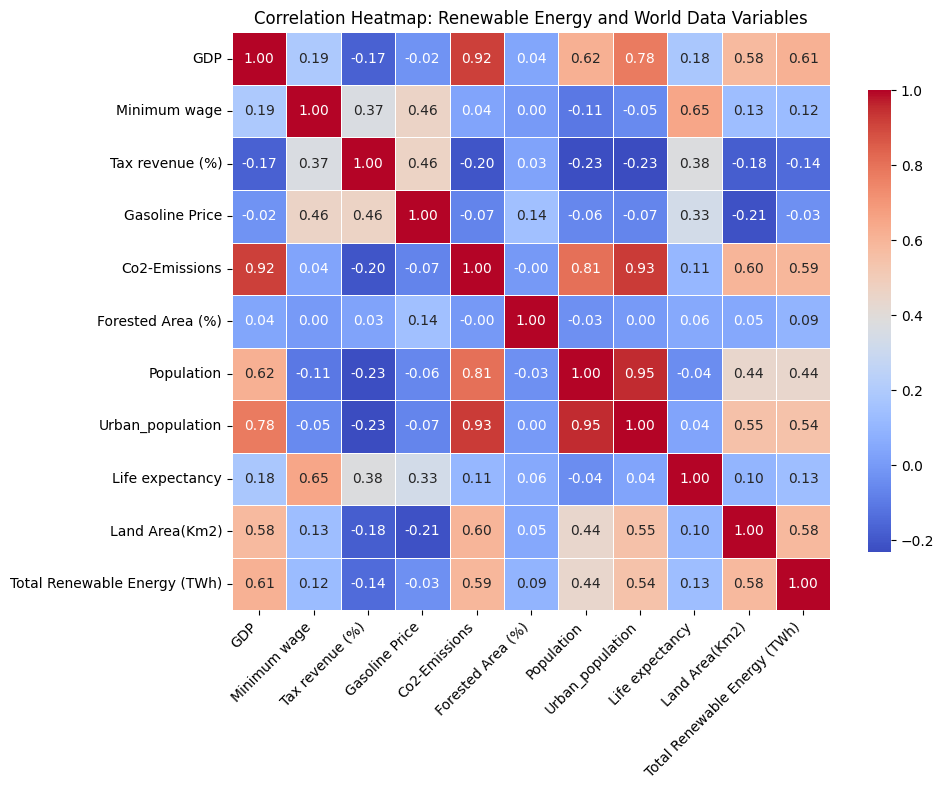

In [ ]:
renewable_data.rename(columns={
    'Entity': 'Country',
    'Electricity from wind (TWh)': 'Wind (TWh)',
    'Electricity from hydro (TWh)': 'Hydro (TWh)',
    'Electricity from solar (TWh)': 'Solar (TWh)',
    'Other renewables including bioenergy (TWh)': 'Other Renewables (TWh)'
}, inplace=True)

world_data['Country'] = world_data['Country'].str.strip()

percentage_cols = [
    'Agricultural Land( %)', 'Forested Area (%)',
    'Population: Labor force participation (%)', 'Urban_population'
]
for col in percentage_cols:
    world_data[col] = (
        world_data[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('%', '', regex=False)
        .replace('', np.nan)
        .astype(float)
    )

merged_data = pd.merge(renewable_data, world_data, on='Country', how='inner')

merged_data['Total Renewable Energy (TWh)'] = (
    merged_data['Wind (TWh)'] +
    merged_data['Hydro (TWh)'] +
    merged_data['Solar (TWh)'] +
    merged_data['Other Renewables (TWh)']
)

columns_to_clean = [
    'GDP', 'Minimum wage', 'Gasoline Price',
    'Co2-Emissions', 'Land Area(Km2)', 'Tax revenue (%)',
    'Population', 'Life expectancy'
]
for col in columns_to_clean:
    merged_data[col] = (
        merged_data[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace(r'[^\d.]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
    )

additional_numerical_cols = ['Urban_population']
for col in additional_numerical_cols:
    merged_data[col] = (
        merged_data[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .replace('', np.nan)
        .astype(float)
    )

variables = [
    'GDP', 'Minimum wage', 'Tax revenue (%)', 'Gasoline Price',
    'Co2-Emissions', 'Forested Area (%)', 'Population',
    'Urban_population', 'Life expectancy', 'Land Area(Km2)',
    'Total Renewable Energy (TWh)'
]
cleaned_data = merged_data[variables].dropna()

print(cleaned_data.dtypes)

correlation_matrix = cleaned_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap: Renewable Energy and World Data Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
total_renewable_corr = correlation_matrix['Total Renewable Energy (TWh)'].drop('Total Renewable Energy (TWh)')
sorted_corr = total_renewable_corr.sort_values(ascending=False)

print("Correlation of Total Renewable Energy (TWh) with Other Variables:\n")
print(sorted_corr)


Correlation of Total Renewable Energy (TWh) with Other Variables:

GDP                  0.613214
Co2-Emissions        0.592620
Land Area(Km2)       0.584493
Urban_population     0.543127
Population           0.438132
Life expectancy      0.134308
Minimum wage         0.124299
Forested Area (%)    0.092266
Gasoline Price      -0.033133
Tax revenue (%)     -0.141291
Name: Total Renewable Energy (TWh), dtype: float64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_variables = ['GDP', 'Co2-Emissions', 'Land Area(Km2)', 'Urban_population', 'Population']
vif_data = cleaned_data[vif_variables].copy()

vif_data = vif_data.dropna()

vif_data_with_const = add_constant(vif_data)

vif_df = pd.DataFrame()
vif_df['Variable'] = vif_data.columns
vif_df['VIF'] = [variance_inflation_factor(vif_data_with_const.values, i+1)
                for i in range(len(vif_data.columns))]


print(vif_df)

           Variable        VIF
0               GDP   8.531258
1     Co2-Emissions  26.440384
2    Land Area(Km2)   1.624880
3  Urban_population  51.198764
4        Population  21.159446


In [ ]:
cleaned_data['GDP per Capita'] = cleaned_data['GDP'] / cleaned_data['Population']

print(cleaned_data[['GDP', 'Population', 'GDP per Capita']].head())

            GDP  Population  GDP per Capita
0  1.910135e+10  38041754.0      502.115487
1  1.910135e+10  38041754.0      502.115487
2  1.910135e+10  38041754.0      502.115487
3  1.910135e+10  38041754.0      502.115487
4  1.910135e+10  38041754.0      502.115487


In [ ]:
cleaned_data['Co2-Emissions per Capita'] = cleaned_data['Co2-Emissions'] / cleaned_data['Population']

In [ ]:
cleaned_data['Economic_Index'] = cleaned_data['GDP'] * cleaned_data['Urban_population'] / cleaned_data['Population']

In [ ]:
vif_variables_updated = ['Economic_Index', 'Land Area(Km2)', 'Co2-Emissions']

vif_data = cleaned_data[vif_variables_updated].dropna()

vif_data_with_const = add_constant(vif_data)

vif_df = pd.DataFrame()
vif_df['Variable'] = vif_data.columns
vif_df['VIF'] = [
    variance_inflation_factor(vif_data_with_const.values, i + 1)
    for i in range(len(vif_data.columns))
]

print("\nVIF for New Selected Variables:")
print(vif_df)


VIF for New Selected Variables:
         Variable       VIF
0  Economic_Index  3.483611
1  Land Area(Km2)  1.594006
2   Co2-Emissions  3.670134


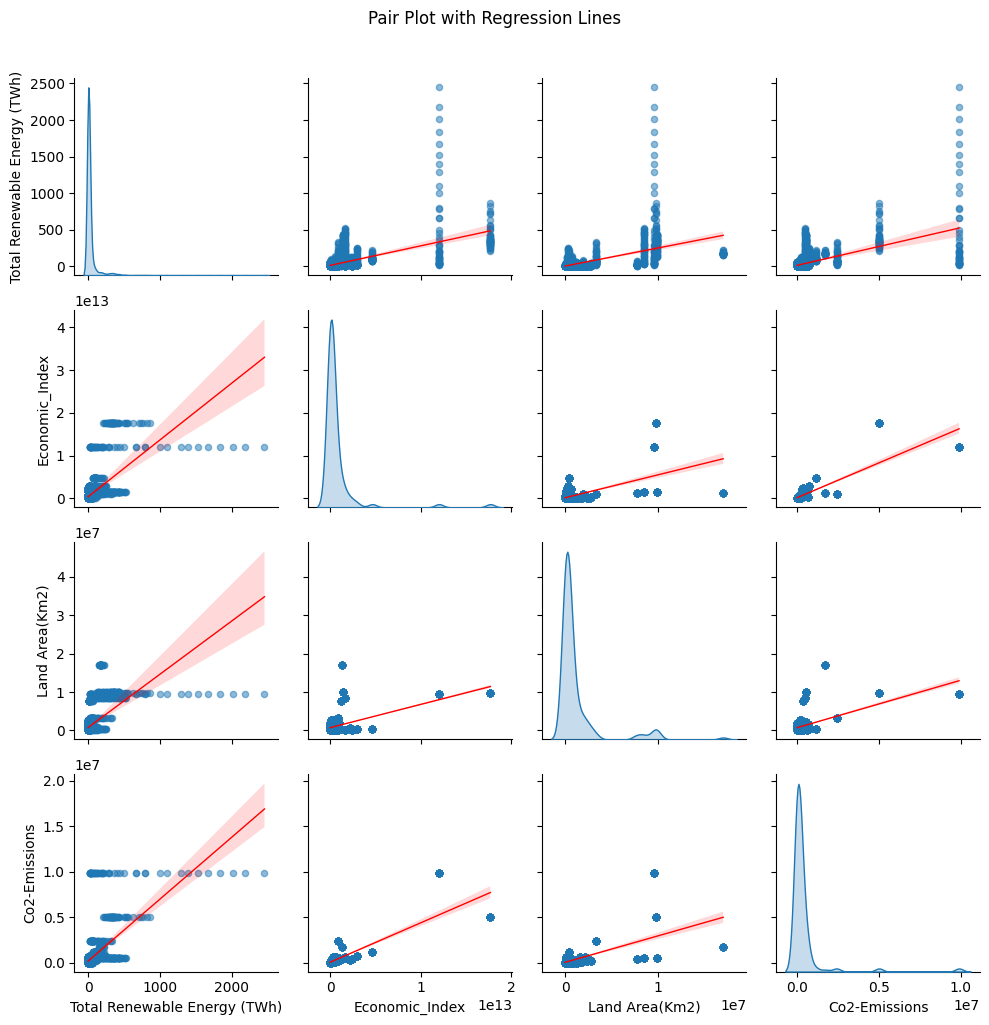

In [ ]:
variables = ['Total Renewable Energy (TWh)', 'Economic_Index', 'Land Area(Km2)', 'Co2-Emissions']

pair_plot = sns.pairplot(
    cleaned_data[variables],
    kind='reg',
    diag_kind='kde',
    height=2.5,
    plot_kws={
        'scatter_kws': {'alpha': 0.5, 's': 20},
        'line_kws': {'color': 'red', 'linewidth': 1}
    }
)

pair_plot.fig.suptitle("Pair Plot with Regression Lines", y=1.02)

plt.tight_layout()

plt.show()


In [ ]:
cleaned_data['log_Total_Renewable'] = np.log1p(cleaned_data['Total Renewable Energy (TWh)'])
cleaned_data['log_Economic_Index'] = np.log1p(cleaned_data['Economic_Index'])
cleaned_data['log_Land_Area'] = np.log1p(cleaned_data['Land Area(Km2)'])
cleaned_data['log_Co2_Emissions'] = np.log1p(cleaned_data['Co2-Emissions'])

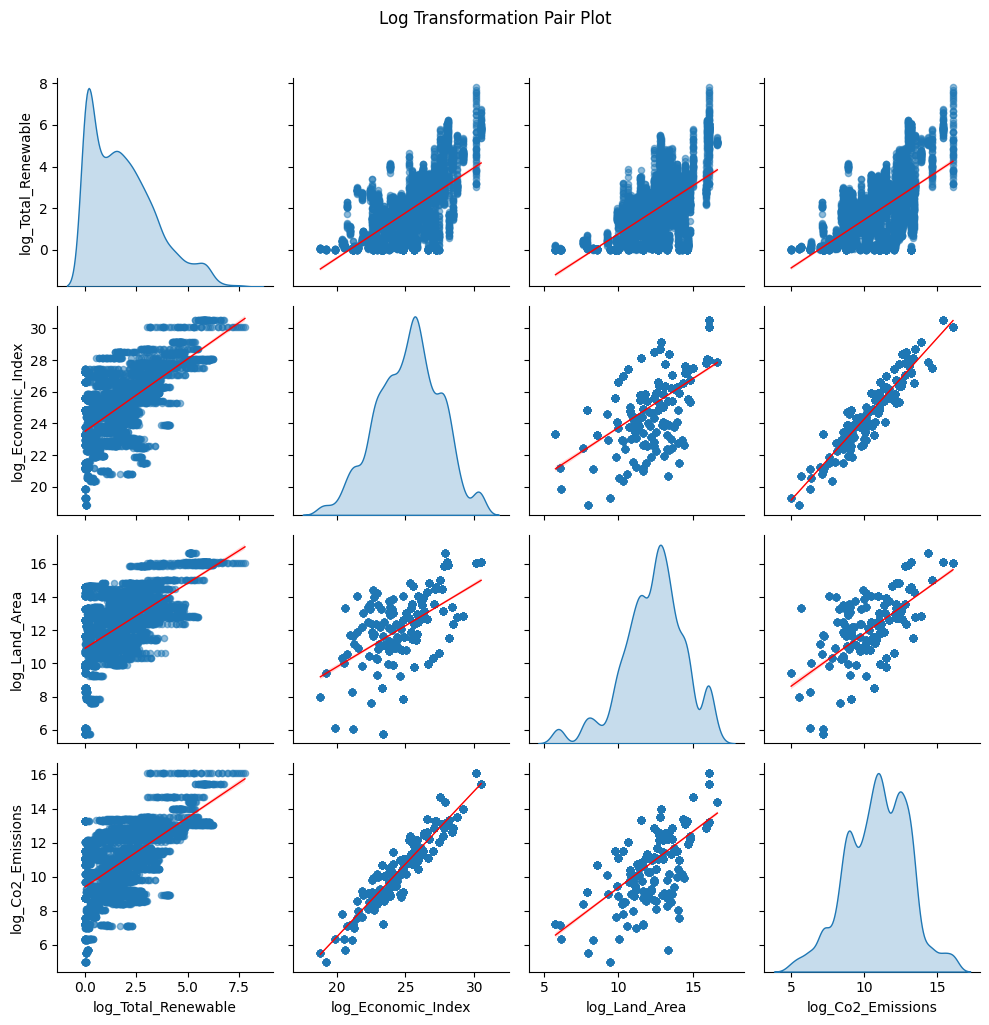

In [ ]:
log_variables = ['log_Total_Renewable', 'log_Economic_Index', 'log_Land_Area', 'log_Co2_Emissions']

pair_plot = sns.pairplot(
    cleaned_data[log_variables],
    kind='reg',
    diag_kind='kde',
    height=2.5,
    plot_kws={
        'scatter_kws': {'alpha': 0.5, 's': 20},
        'line_kws': {'color': 'red', 'linewidth': 1}
    }
)

pair_plot.fig.suptitle("Log Transformation Pair Plot", y=1.02)

plt.tight_layout()

plt.show()


<ipython-input-33-49105f18788e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




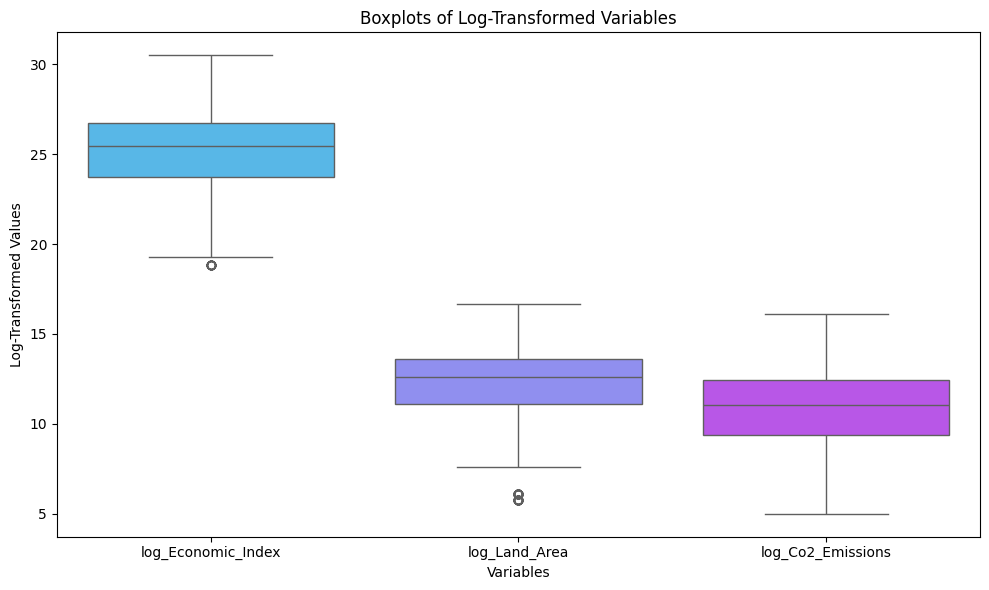

In [ ]:
melted_data = cleaned_data.melt(
    value_vars=['log_Economic_Index', 'log_Land_Area', 'log_Co2_Emissions'],
    var_name='Variable',
    value_name='Log_Value'
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Log_Value', data=melted_data, palette='cool')
plt.title("Boxplots of Log-Transformed Variables")
plt.xlabel("Variables")
plt.ylabel("Log-Transformed Values")
plt.tight_layout()
plt.show()

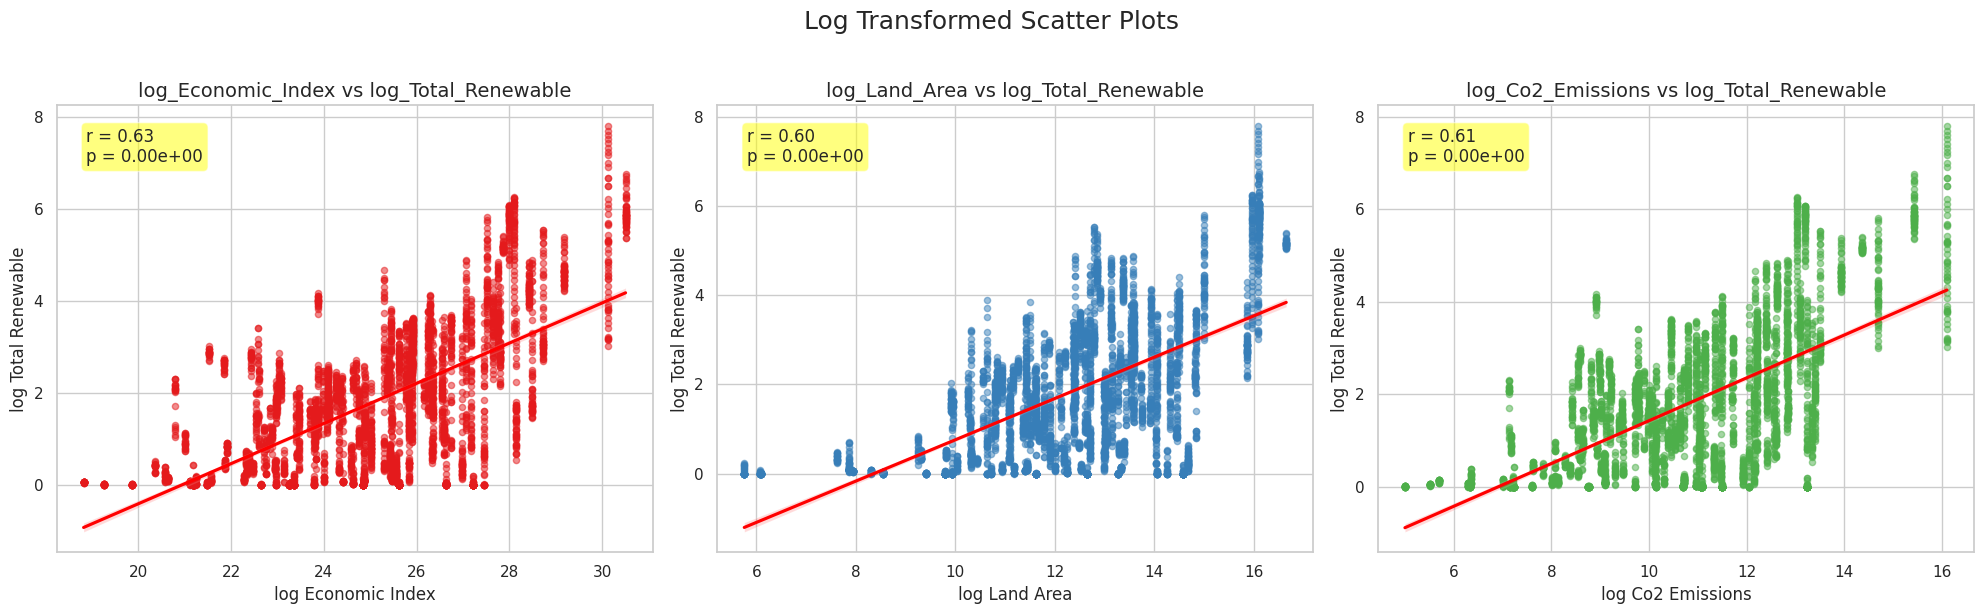

In [ ]:
scatter_pairs = [
    ('log_Economic_Index', 'log_Total_Renewable'),
    ('log_Land_Area', 'log_Total_Renewable'),
    ('log_Co2_Emissions', 'log_Total_Renewable')
]

scatter_colors = sns.color_palette("Set1", n_colors=3)

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, (x_var, y_var), color in zip(axes, scatter_pairs, scatter_colors):
    sns.regplot(
        x=x_var,
        y=y_var,
        data=cleaned_data,
        ax=ax,
        scatter_kws={'alpha': 0.5, 's': 20, 'color': color},
        line_kws={'color': 'red'}
    )
    r, p = pearsonr(cleaned_data[x_var], cleaned_data[y_var])
    ax.annotate(f'r = {r:.2f}\np = {p:.2e}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=12,
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    ax.set_title(f'{x_var} vs {y_var}', fontsize=14)
    ax.set_xlabel(x_var.replace('_', ' '), fontsize=12)
    ax.set_ylabel(y_var.replace('_', ' '), fontsize=12)

plt.suptitle("Log Transformed Scatter Plots", fontsize=18, y=1.02)
plt.tight_layout()

plt.savefig("scatter_plots_with_distinct_dots_and_annotations.png", dpi=300, bbox_inches='tight')

plt.show()

# Regression Analysis

---

# New Section

In [ ]:
cleaned_data = cleaned_data.replace([np.inf, -np.inf], np.nan).dropna(subset=log_variables)

X = cleaned_data[['log_Economic_Index', 'log_Land_Area', 'log_Co2_Emissions']]
X = sm.add_constant(X)

y = cleaned_data['log_Total_Renewable']

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     log_Total_Renewable   R-squared:                       0.496
Model:                             OLS   Adj. R-squared:                  0.496
Method:                  Least Squares   F-statistic:                     1436.
Date:                 Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                         01:14:46   Log-Likelihood:                -6732.3
No. Observations:                 4379   AIC:                         1.347e+04
Df Residuals:                     4375   BIC:                         1.350e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.9

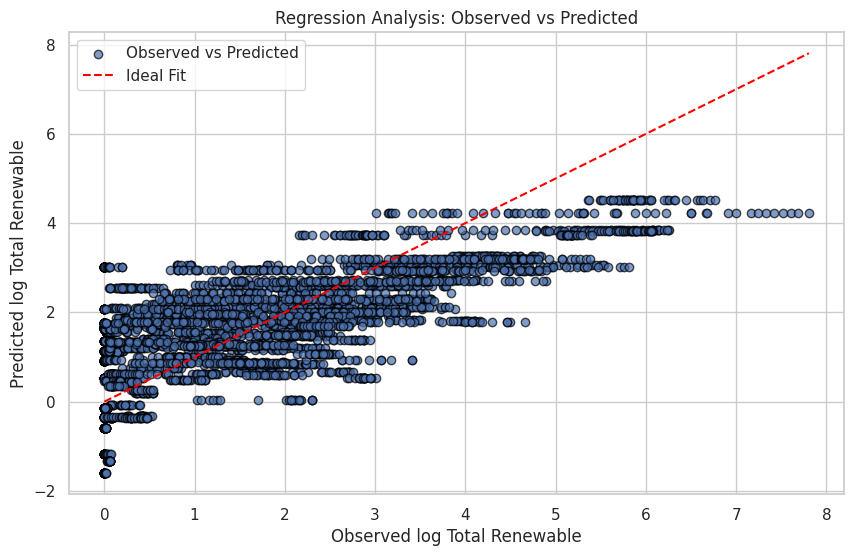

In [ ]:
cleaned_data['Predicted'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(
    cleaned_data['log_Total_Renewable'],
    cleaned_data['Predicted'],
    alpha=0.7,
    label='Observed vs Predicted',
    edgecolors='black',
)
plt.plot(
    [cleaned_data['log_Total_Renewable'].min(), cleaned_data['log_Total_Renewable'].max()],
    [cleaned_data['log_Total_Renewable'].min(), cleaned_data['log_Total_Renewable'].max()],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel('Observed log Total Renewable')
plt.ylabel('Predicted log Total Renewable')
plt.title('Regression Analysis: Observed vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


# K-Means Clustering

---

In [ ]:
cleaned_data_log = cleaned_data.copy()
cleaned_data_log['log_Total_Renewable'] = np.log1p(cleaned_data_log['Total Renewable Energy (TWh)'])
cleaned_data_log['log_Economic_Index'] = np.log1p(cleaned_data_log['Economic_Index'])
cleaned_data_log['log_Land_Area'] = np.log1p(cleaned_data_log['Land Area(Km2)'])
cleaned_data_log['log_Co2_Emissions'] = np.log1p(cleaned_data_log['Co2-Emissions'])

In [ ]:
clustering_vars_log = [
    'log_Economic_Index',
    'log_Co2_Emissions',
    'log_Land_Area'
]

X_cluster_log = cleaned_data_log[clustering_vars_log]

X_cluster_log = X_cluster_log.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
scaler = StandardScaler()
X_scaled_log = scaler.fit_transform(X_cluster_log)

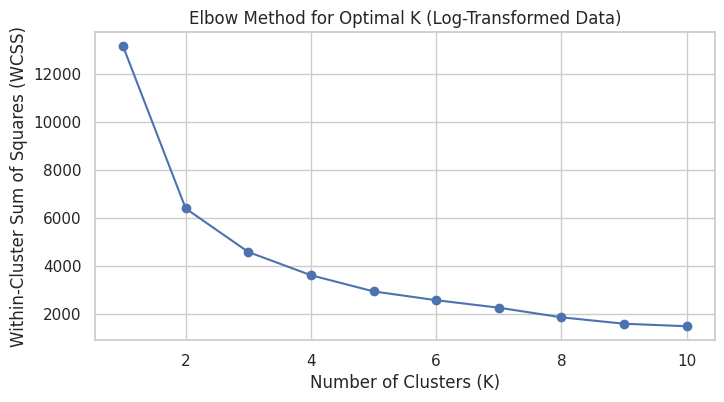

In [ ]:
wcss_log = []
K = range(1, 11)
for k in K:
    kmeans_log = KMeans(n_clusters=k, random_state=42)
    kmeans_log.fit(X_scaled_log)
    wcss_log.append(kmeans_log.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss_log, marker='o')
plt.title('Elbow Method for Optimal K (Log-Transformed Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
optimal_k_log = 3

kmeans_log = KMeans(n_clusters=optimal_k_log, random_state=42)
kmeans_log.fit(X_scaled_log)

cleaned_data_log = cleaned_data_log.loc[X_cluster_log.index]
cleaned_data_log['Cluster'] = kmeans_log.labels_

cluster_profiles_log = cleaned_data_log.groupby('Cluster')[clustering_vars_log].mean()
print("Cluster Profiles (Log-Transformed Variables):")
print(cluster_profiles_log)

cluster_profiles_exp = np.expm1(cluster_profiles_log)
print("\nCluster Profiles (Exponentiated to Original Scale):")
print(cluster_profiles_exp)

Cluster Profiles (Log-Transformed Variables):
         log_Economic_Index  log_Co2_Emissions  log_Land_Area
Cluster                                                      
0                 27.978471          13.439394      14.381961
1                 25.449160          11.212087      12.376361
2                 22.691089           8.543970      10.780001

Cluster Profiles (Exponentiated to Original Scale):
         log_Economic_Index  log_Co2_Emissions  log_Land_Area
Cluster                                                      
0              1.415453e+12      686521.346168   1.762000e+06
1              1.128313e+11       74018.753916   2.371285e+05
2              7.155087e+09        5134.692735   4.804915e+04


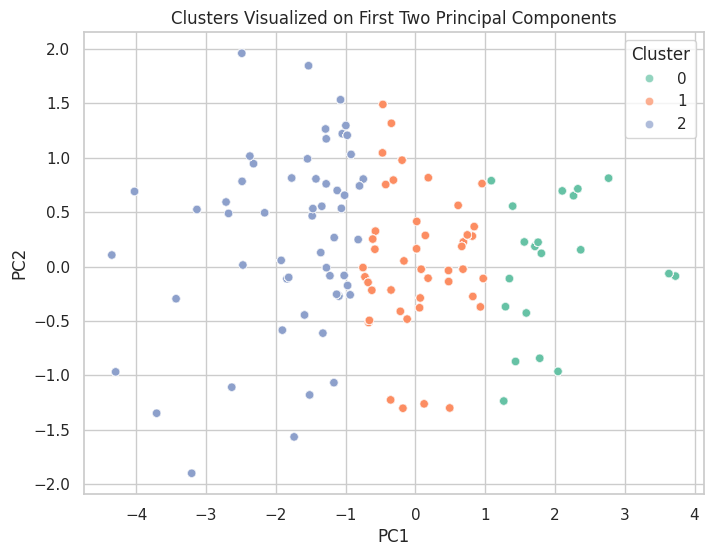

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_log)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_cluster_log.index)
pca_df['Cluster'] = kmeans_log.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', alpha=0.7)
plt.title('Clusters Visualized on First Two Principal Components')
plt.show()